<a href="https://colab.research.google.com/github/chingyaousf/Machine-Learning/blob/main/class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn 

**Loading files using Pandas**

In [ ]:
data = pd.read_csv("/content/sample_data/california_housing_train.csv")

**Show data**

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


**split dataset in features and target variable**

In [ ]:
features = ["longitude","latitude","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]
x = data[features] #feature variable
y = data["housing_median_age"] #target variable

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Split dataset into training set and test set**

In [ ]:
from pandas.core.common import random_state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4798,-118.09,34.05,1764.0,357.0,1379.0,363.0,3.5357,199000.0
13913,-122.03,37.56,4981.0,964.0,2841.0,924.0,4.8962,220200.0
7159,-118.32,33.74,6097.0,794.0,2248.0,806.0,10.1357,500001.0
7878,-118.40,34.13,8262.0,1156.0,2712.0,1125.0,10.5575,500001.0
287,-116.76,34.29,3959.0,849.0,1064.0,376.0,2.8214,111400.0
...,...,...,...,...,...,...,...,...
7813,-118.39,34.04,1873.0,286.0,635.0,283.0,5.5951,461300.0
10955,-120.89,37.59,1016.0,206.0,617.0,209.0,2.1510,195800.0
5192,-118.13,33.86,2259.0,425.0,1183.0,413.0,5.1805,201600.0
12172,-121.45,38.52,1477.0,321.0,888.0,312.0,2.5592,70300.0


*Load* Data

**Create Decision Tree classifer object**

In [ ]:
clf = DecisionTreeClassifier()

**Train Decision Tree Classifer**

In [ ]:
clf = clf.fit(x_train,y_train)

**Predict the response for test dataset**

In [ ]:
y_pred = clf.predict(x_test)

**Let's estimate, how accurately the classifier or model can predict the age of houses (median age for the neighborhood).**

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.07352941176470588


**Improving Performance**

criterion : optional (default=”gini”) or Choose attribute selection measure

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.07901960784313726


**Visualize the Tree**

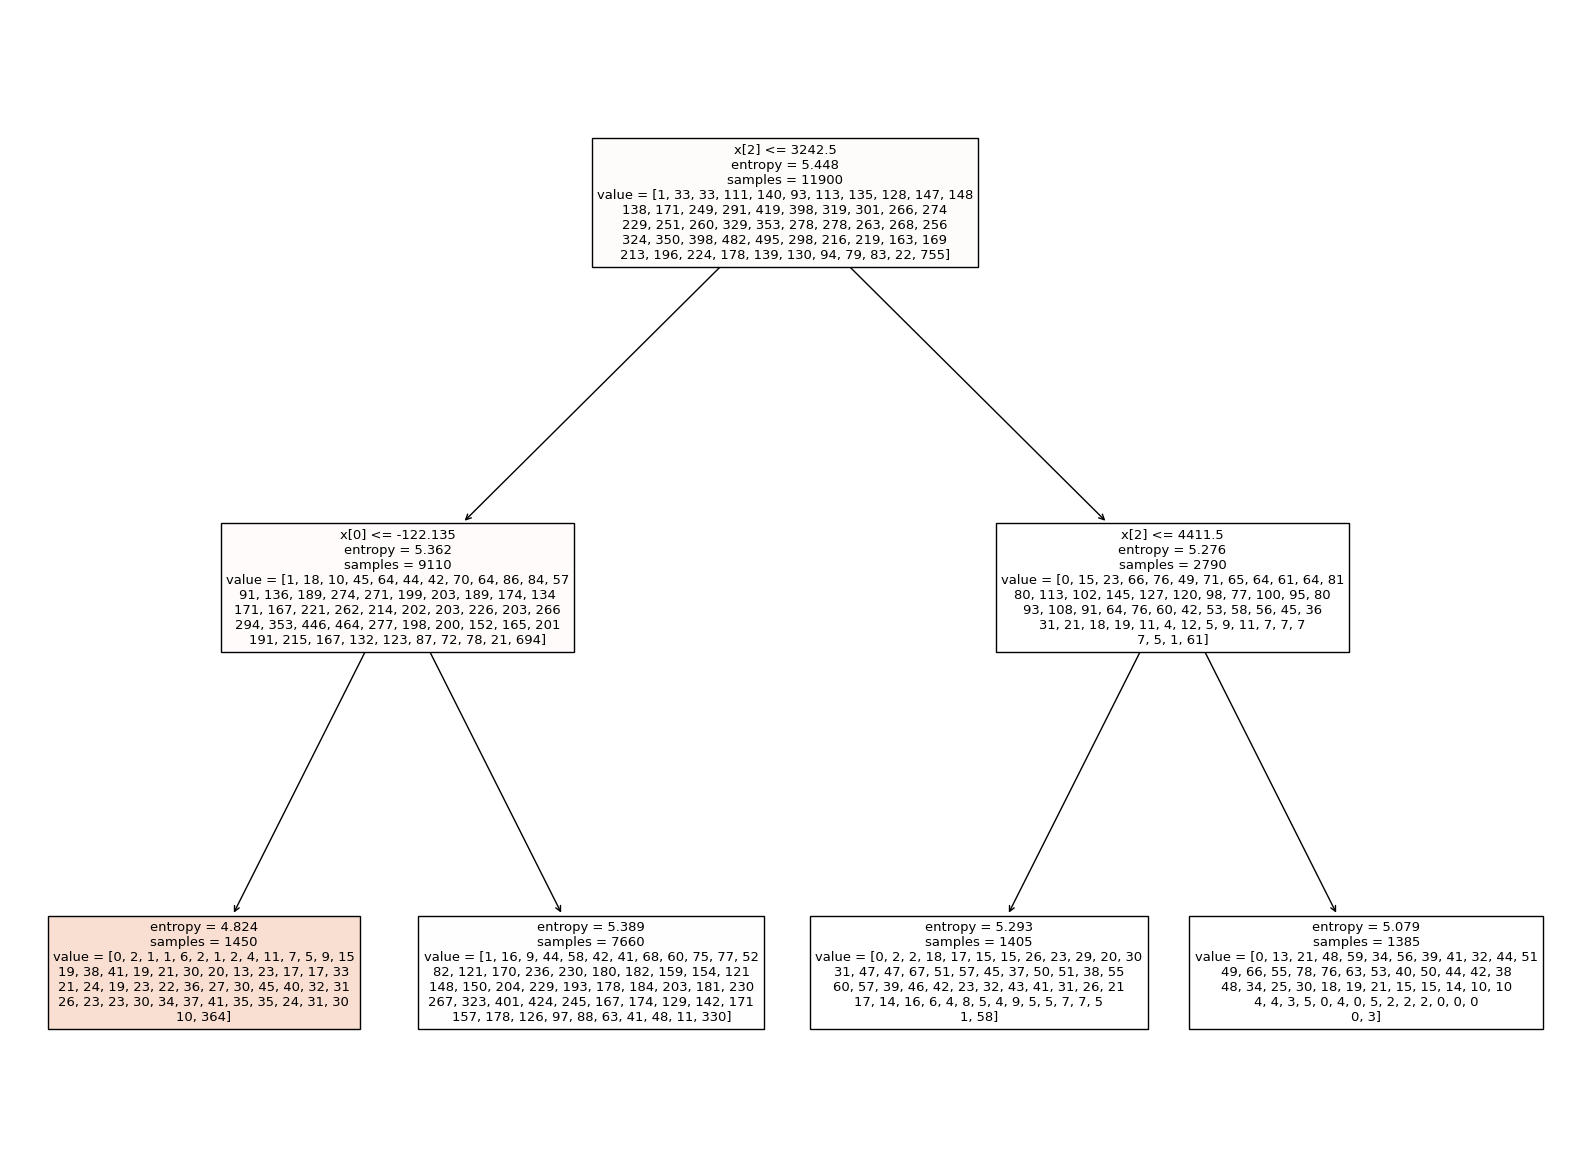

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(20,15))
_=tree.plot_tree(clf,filled=True)


**Let's Use Random Forest on the same data.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=3,criterion="entropy" ,random_state=0)

**Let's train this model using the training set and its corresponding labels**

In [ ]:
clf = clf.fit(x_train,y_train)

**Apply the learned model on the test data**

In [ ]:
y_pred = clf.predict(x_test)

**Now Let's See the model's performance on the test data**
First, we calculate the accuracy. We also show a confution matrix for each class

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion", metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.08352941176470588
Confusion [[  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   5]
 [  0   0   0 ...   0   0   3]
 ...
 [  0   0   0 ...   0   0  27]
 [  0   0   0 ...   0   0  10]
 [  0   0   0 ...   0   0 284]]


**Now let's move on with precison, recall, and F1-score. **
**Since this is a multi-class classification problem, we take the average for each class (treat it as several binary classification)**

In [ ]:
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_score:", metrics.f1_score(y_test, y_pred, average='macro'))

Precision: 0.02365314095069201
Recall: 0.03354313308852043
F1_score: 0.01440346971270023


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Or we can get all three in one line of code**

In [ ]:
print("all:", metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))

all: (0.02365314095069201, 0.03354313308852043, 0.01440346971270023, None)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
precision, recall, f1, _ = metrics.precision_recall_fscore_support(y_test, y_pred, average=None)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**NOTE: By examining the precision, recall, and F1-score values for each class, wecan identify which classes are performing well and which classes need improvement, and then take actions to improve the model's performance on specific classes.**

In [ ]:
precision, recall, f1, _ = metrics.precision_recall_fscore_support(y_test, y_pred, average=None)

for i in range(len(precision)):
    print(f"Class {i}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-score: {f1[i]}")
    print()


Class 0:
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 1:
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 2:
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 3:
Precision: 0.22727272727272727
Recall: 0.1
F1-score: 0.1388888888888889

Class 4:
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 5:
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 6:
Precision: 0.5
Recall: 0.02631578947368421
F1-score: 0.05

Class 7:
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 8:
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 9:
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 10:
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 11:
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 12:
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 13:
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 14:
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 15:
Precision: 0.08641975308641975
Recall: 0.35648148148148145
F1-score: 0.13911472448057813

Class 16:
Precision: 0.08264462809917356
Recall: 0.11235955056179775
F1-score: 0.0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Finally, let's get the AUC as well.**

In [ ]:
print("auc:", metrics.roc_auc_score(y_test, clf.predict_proba(x_test), average='macro', multi_class='ovo'))

auc: 0.6864774308663376


**Try to plot the ROC** **curve**

***Check the size of y_test***

In [ ]:
y_test

4752     19.0
13348    23.0
13459    39.0
6691     22.0
12750    15.0
         ... 
233       8.0
7568     36.0
4821     36.0
10356    26.0
4311     29.0
Name: housing_median_age, Length: 5100, dtype: float64

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape #(n_samples, n_classes)

(5100, 52)

***We can check the one-hot encoding of each class***

In [ ]:
label_binarizer.transform([4])

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]])

**class_of_interest =4**

In [ ]:
class_of_interest =4
class_id = np.flatnonzero (label_binarizer.classes_==class_of_interest)[0]
class_id


3

**Now we can plot it as follows**

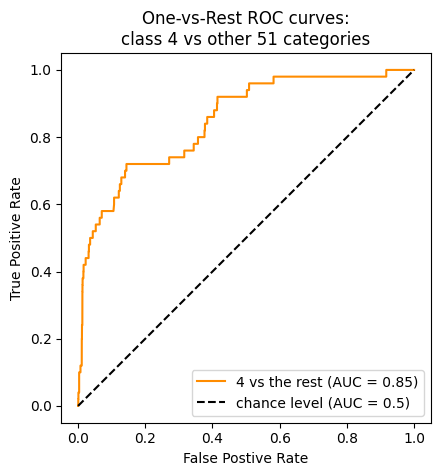

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    clf.predict_proba(x_test)[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nclass 4 vs other 51 categories")
plt.legend()
plt.show()


**Build a naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(x_train, y_train)

GaussianNB()

**Now we can predict output using the learned model**

In [ ]:
y_pred = clf.predict(x_test)

**Now we are ready to evaluate the prediction**

In [ ]:
import sklearn.metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_score:", metrics.f1_score(y_test, y_pred, average='macro'))
print("all:", metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))

Accuracy: 0.07980392156862745
Precision: 0.019716224771700933
Recall: 0.0386164733472708
F1_score: 0.019864534807876904
all: (0.019716224771700933, 0.0386164733472708, 0.019864534807876904, None)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Lets train a neural network ***

In [ ]:
from sklearn.neural_network import MLPClassifier

**Next, we create the classffier and train MLP on training set**

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=200, solver='sgd')
clf.fit(x_train, y_train)
clf.predict_proba(x_test)

array([[0.01916074, 0.01841552, 0.01655211, ..., 0.01794619, 0.01475527,
        0.0237371 ],
       [0.01916074, 0.01841552, 0.01655211, ..., 0.01794619, 0.01475527,
        0.0237371 ],
       [0.01916074, 0.01841552, 0.01655211, ..., 0.01794619, 0.01475527,
        0.0237371 ],
       ...,
       [0.01916074, 0.01841552, 0.01655211, ..., 0.01794619, 0.01475527,
        0.0237371 ],
       [0.01916074, 0.01841552, 0.01655211, ..., 0.01794619, 0.01475527,
        0.0237371 ],
       [0.01916074, 0.01841552, 0.01655211, ..., 0.01794619, 0.01475527,
        0.0237371 ]])

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
import sklearn.metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_score:", metrics.f1_score(y_test, y_pred, average='macro'))
print("all:", metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))

Accuracy: 0.043137254901960784
Precision: 0.0008295625942684766
Recall: 0.019230769230769232
F1_score: 0.0015905147484094851
all: (0.0008295625942684766, 0.019230769230769232, 0.0015905147484094851, None)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Let's practice the same in a deep learning library TensorFlow. We don't want run our model on GPU in this exercise.**

In [ ]:
import tensorflow as tf
print(tf.__version__) #check thye version of tensorFlow you are using
print(tf.config.list_physical_devices('GPU')) #optional

2.12.0
[]


**Next, we need to build our neural network model using Keras API in tensorFlow**

In [ ]:
from keras.layers.attention.multi_head_attention import activation
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(8)))
model.add(tf.keras.layers.Dense(units=53,activation=tf.nn.softmax))

In [ ]:
print(x_train.shape, y_train.shape)

(11900, 8) (11900,)


**let's train the model using a loss function (same log loss or cross entropy we used in scikit learn)**
**sparse_categorical_crossentropy automatically does the one-hot encoding on the output layer as we talked about in the class.**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
372/372 [==============================] - 1s 2ms/step - loss: 28511.6875 - accuracy: 0.0277
Epoch 2/100
372/372 [==============================] - 1s 2ms/step - loss: 3017.2141 - accuracy: 0.0261
Epoch 3/100
372/372 [==============================] - 1s 2ms/step - loss: 483.1971 - accuracy: 0.0286
Epoch 4/100
372/372 [==============================] - 1s 2ms/step - loss: 326.7941 - accuracy: 0.0328
Epoch 5/100
372/372 [==============================] - 1s 2ms/step - loss: 305.0477 - accuracy: 0.0330
Epoch 6/100
372/372 [==============================] - 1s 2ms/step - loss: 306.4843 - accuracy: 0.0297
Epoch 7/100
372/372 [==============================] - 1s 2ms/step - loss: 307.3656 - accuracy: 0.0325
Epoch 8/100
372/372 [==============================] - 1s 2ms/step - loss: 305.8657 - accuracy: 0.0339
Epoch 9/100
372/372 [==============================] - 1s 2ms/step - loss: 319.9843 - accuracy: 0.0318
Epoch 10/100
372/372 [==============================] - 1s 2ms/step - 

**Now that the model is trained let's use it to make prediction**

In [ ]:
predictions= model.predict(x_test)
y_pred = np.argmax(predictions,axis=-1)
print('test accuracy', np.sum(y_pred==y_test)/len(y_test))

160/160 [==============================] - 0s 1ms/step
test accuracy 0.02588235294117647


**Let's add one more hidden layer with 100 neurons to our neural network model**

In [ ]:
predictions
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(8)))
model.add(tf.keras.layers.Dense(units=100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=53,activation=tf.nn.softmax))

**Now let's re-train the new model and test its accuracy**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
372/372 [==============================] - 1s 2ms/step - loss: 4626.3794 - accuracy: 0.0287
Epoch 2/100
372/372 [==============================] - 1s 2ms/step - loss: 2224.5945 - accuracy: 0.0318
Epoch 3/100
372/372 [==============================] - 1s 2ms/step - loss: 2058.7507 - accuracy: 0.0288
Epoch 4/100
372/372 [==============================] - 1s 2ms/step - loss: 1907.0681 - accuracy: 0.0280
Epoch 5/100
372/372 [==============================] - 1s 2ms/step - loss: 1802.7485 - accuracy: 0.0291
Epoch 6/100
372/372 [==============================] - 1s 2ms/step - loss: 1670.6864 - accuracy: 0.0327
Epoch 7/100
372/372 [==============================] - 1s 2ms/step - loss: 1449.3604 - accuracy: 0.0308
Epoch 8/100
372/372 [==============================] - 1s 2ms/step - loss: 1419.7284 - accuracy: 0.0313
Epoch 9/100
372/372 [==============================] - 1s 2ms/step - loss: 1389.0911 - accuracy: 0.0322
Epoch 10/100
372/372 [==============================] - 1s 2ms/s

In [ ]:
predictions= model.predict(x_test)
y_pred = np.argmax(predictions,axis=-1)
print('test accuracy', np.sum(y_pred==y_test)/len(y_test))

160/160 [==============================] - 0s 1ms/step
test accuracy 0.05823529411764706


**SO far all models we focused on were supervised. In this session, we will learn our last supervised model and move on to an unsupervised one. We do not introduce unsupervised deep learning models in this course. My hope is that you get familiar with them in the DSP course!**

**Let's start with K- Nearest Neighbor. Let's do everything in one block of code this time.** For more details on the KNN in ScikitLearn, you can take a look at https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# KNN Model
import numpy as np
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

data = pd.read_csv('/content/sample_data/california_housing_train.csv')
features = ['longitude', 'latitude', 'total_rooms','total_bedrooms','population','households', 'median_income','median_house_value']
X = data[features] # Features
y = data['housing_median_age'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = KNeighborsClassifier(n_neighbors=90)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_score:", metrics.f1_score(y_test, y_pred, average='macro'))


Accuracy: 0.06705882352941177
Precision: 0.029017526812743326
Recall: 0.030008378110291754
F1_score: 0.020335953596645046


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Let's go back an increase the number of neighbors from 3 to 7 to see what happens.**

***I test, until now the 90 neighbor has the highest accuracy***

**Now ready for some unsupervised learning? Let's make a K-Means Cluster model. Can you tell what features we need for clustering?**

In [ ]:
from sklearn.cluster import KMeans
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
features = ['longitude', 'latitude', 'total_rooms','total_bedrooms','population','households', 'median_income','median_house_value']
X = data[features] # Features

**Do we need to include the target variable we used to have in supervised models?**
***we don't need target because it's unsupervised***

**Let's define an unsupervised model and name it kmeans_model with two clusters.**

In [ ]:
kmeans_model = KMeans(n_clusters=2, random_state=0, n_init="auto")

**Let's train the model with the algorithm we discussed today and see the labels assigned to each sample int the training data as well as the centroids**

In [ ]:
kmeans_model = kmeans_model.fit(X)
kmeans_model.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
kmeans_model.cluster_centers_

array([[-1.19840226e+02,  3.54182994e+01,  3.05505207e+03,
         5.62330279e+02,  1.35173654e+03,  5.29455642e+02,
         5.65482970e+00,  3.68401925e+05],
       [-1.19462741e+02,  3.56991561e+01,  2.49668160e+03,
         5.31222036e+02,  1.45738411e+03,  4.91134451e+02,
         3.25073571e+00,  1.49741868e+05]])

**Interestingly, we can use these labels to make predictions as well! To do this, we can use the ""predict" function. See https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html**



**This function, predicts the closest cluster each sample in X belongs to.**
Let's do this for the first three samples in our test dataset.

In [ ]:
kmeans_model.predict(X_test.head(3))

array([0, 0, 0], dtype=int32)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.07901960784313726


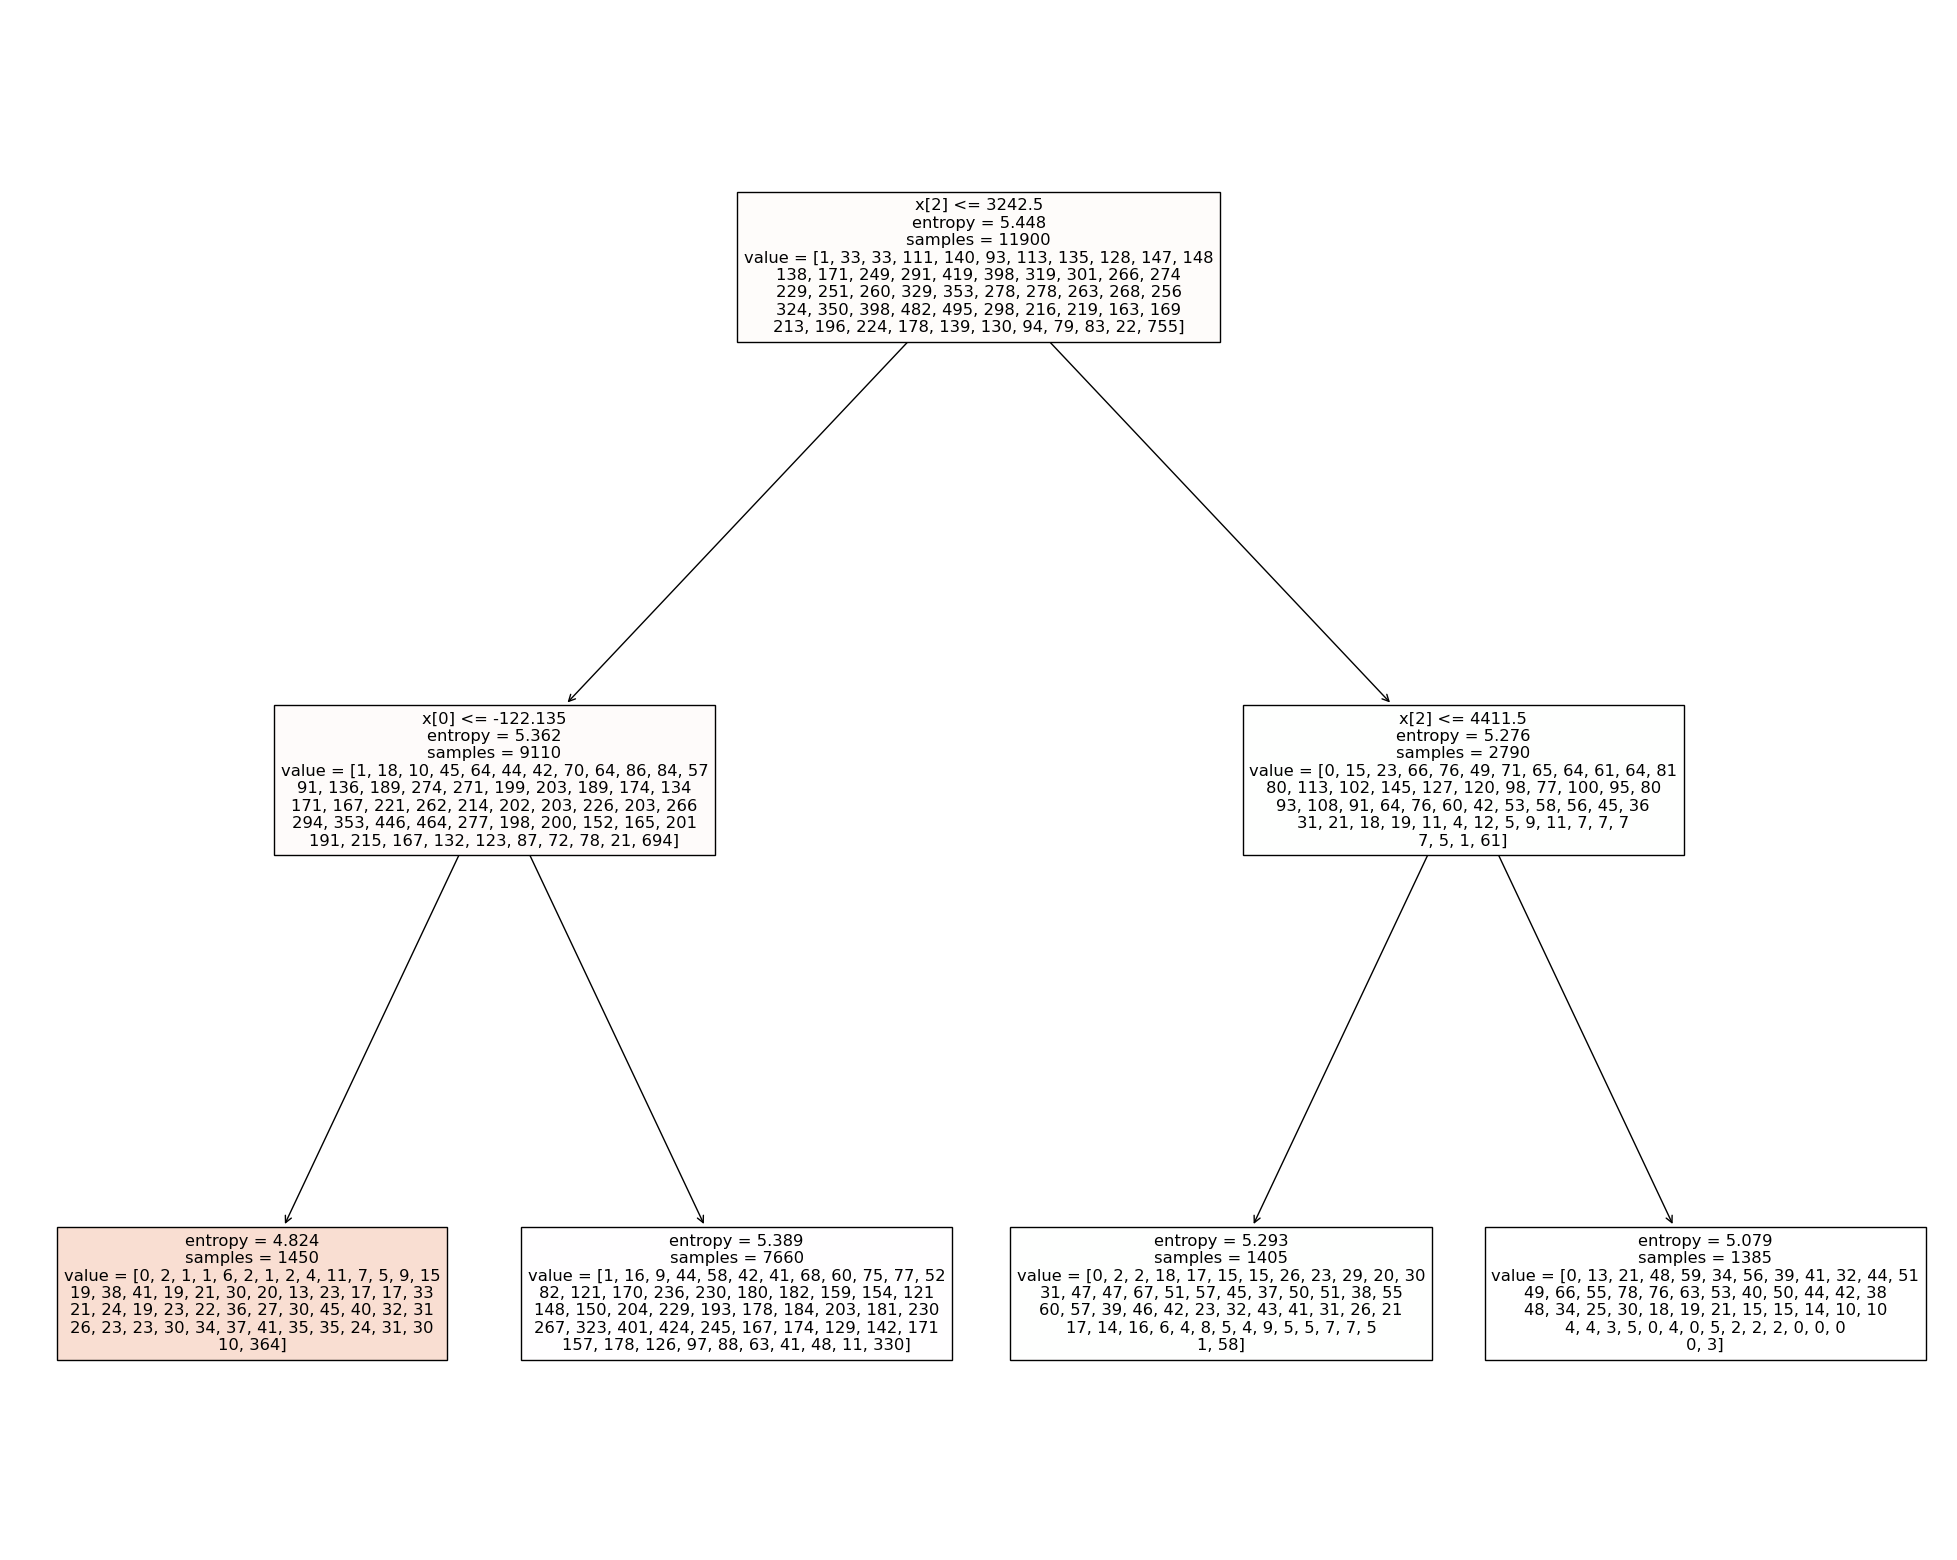

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,filled=True)

In [ ]:
pd.read_csv("/content/sample_data/california_housing_train.csv")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
california_housing_train[california_housing_train['housing_median_age'] > 20]



NameError: ignored

In [ ]:
selected_rows = california_housing_train[california_housing_train['housing_median_age'] > 20]
selected_rows.to_csv("selected_rows.csv", index=False)


In [ ]:
import pandas as pd

california_housing_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
print(california_housing_train.head())
